# Convolutional Filter in PyTorch
## CPE 490 590 Spring 2024
### Author: Rahul Bhadani

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the 3x3 edge detection filter
edge_filter = torch.tensor([[1, 0, -1],
                            [0, 0, 0],
                            [-1, 0, 1]], dtype=torch.float32)

sobel_filter = torch.tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=torch.float32)
# zero_filter = torch.tensor([[0, 0, 0], [0, 0, 0], [0, 0, 0]], dtype=torch.float32)


In [10]:
# Load and preprocess the image
image_path = './Dataset/CatsDogs/dog.jpg'
# Load and preprocess data
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale -- Optional
    transforms.ToTensor(),  # Convert images to tensors
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values == Needs this if not converting to grayscale
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values (single channel)
])



In [17]:
image = Image.open(image_path)
input_tensor = transform(image)#.unsqueeze(0)  # Add batch dimension


# Apply the convolutional filter
conv_layer = nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
#conv_layer = nn.Conv2d(3, 1, kernel_size=3, padding=1, bias=False) # Needs this if not converting to grayscale
conv_layer.weight.data[0, 0] = edge_filter
# conv_layer.weight.data[0, 1] = edge_filter # second channel in the colored image
# conv_layer.weight.data[0, 2] = edge_filter  # second channel in the colored image
output_tensor = conv_layer(input_tensor)

# Convert output tensor back to an image
filtered_image = transforms.ToPILImage()(output_tensor.squeeze(0))



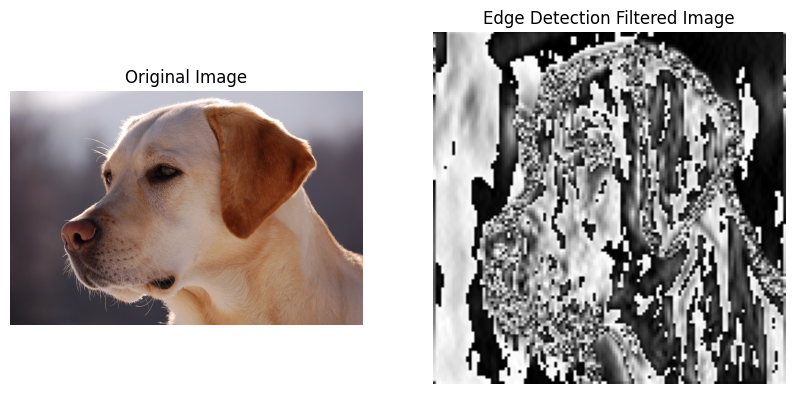

In [18]:
# Display the original and filtered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")
axs[1].imshow(filtered_image, cmap="gray")
axs[1].set_title("Edge Detection Filtered Image")
axs[1].axis("off")
plt.show()

In [13]:
conv_layer.weight.data

tensor([[[[ 1.,  0., -1.],
          [ 0.,  0.,  0.],
          [-1.,  0.,  1.]]]])